# 売れない映画予測

In [1]:
import numpy as np
import pandas as pd

metadata_URL = "./data/movies_metadata.csv"
genres_URL = "./data/genres.csv"
scores_URL = "./data/95%_least_plausible.csv"
links_URL = "./data/links.csv"

In [2]:
# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline


## 1.データ整形

In [3]:
## データフレーム中のstringをdict型のリストに変換する
def make_list_from_str(string):
    if isinstance(string, str):
        result_list = eval(string)
    else:
        result_list = np.nan
    return result_list

In [4]:
##ジャンルのdictから、それぞれのidだけを抜き出したリストの作成
def extract_ids(genres_list):
    id_list = []
    for genre in genres_list:
        id_list.append(genre["id"])
    return id_list

In [5]:
##ジャンルのdictから、それぞれのnameだけを抜き出したリストの作成
def extract_names(genres_list):
    id_list = []
    for genre in genres_list:
        id_list.append(genre["name"])
    return id_list

In [6]:
##int型に変換。できない場合は0を代入
def to_int(str):
    try:
        result = int(str)
    except Exception:
        print(str)
        result = 0
    return result

In [7]:
metadata_df = pd.read_csv(metadata_URL)[["title", "id", "genres", "budget", "revenue", "runtime"]]
metadata_df["genres"] = metadata_df["genres"].map(make_list_from_str)
metadata_df["genres"] = metadata_df["genres"].map(extract_names)
metadata_df["genre_count"] = metadata_df["genres"].map(lambda x: len(x))
metadata_df.head()

/Users/labuser/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,title,id,genres,budget,revenue,runtime,genre_count
0,Toy Story,862,"[Animation, Comedy, Family]",30000000,373554033.0,81.0,3
1,Jumanji,8844,"[Adventure, Fantasy, Family]",65000000,262797249.0,104.0,3
2,Grumpier Old Men,15602,"[Romance, Comedy]",0,0.0,101.0,2
3,Waiting to Exhale,31357,"[Comedy, Drama, Romance]",16000000,81452156.0,127.0,3
4,Father of the Bride Part II,11862,[Comedy],0,76578911.0,106.0,1


In [8]:
print(metadata_df.count())
metadata_df["budget"] = metadata_df["budget"].map(to_int)
print("\n0 budget: ", metadata_df[metadata_df["budget"] == 0]["budget"].count()  )
print("\n0 revenue: ", metadata_df[metadata_df["revenue"] == 0]["revenue"].count()  )
print("\n0 runtime: ", metadata_df[metadata_df["runtime"] == 0]["runtime"].count()  )
metadata_df = metadata_df[metadata_df["budget"] > 0][metadata_df["revenue"] > 0][metadata_df["runtime"] > 0]
metadata_df.info()

title          45460
id             45466
genres         45466
budget         45466
revenue        45460
runtime        45203
genre_count    45466
dtype: int64
/ff9qCepilowshEtG2GYWwzt2bs4.jpg
/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
/zaSf5OG7V8X8gqFvly88zDdRm46.jpg

0 budget:  36576

0 revenue:  38052

0 runtime:  1558
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 0 to 45422
Data columns (total 7 columns):
title          5369 non-null object
id             5369 non-null object
genres         5369 non-null object
budget         5369 non-null int64
revenue        5369 non-null float64
runtime        5369 non-null float64
genre_count    5369 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 335.6+ KB


/Users/labuser/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [9]:
metadata_df.head()

,title,id,genres,budget,revenue,runtime,genre_count
0,Toy Story,862,"[Animation, Comedy, Family]",30000000,373554033.0,81.0,3
1,Jumanji,8844,"[Adventure, Fantasy, Family]",65000000,262797249.0,104.0,3
3,Waiting to Exhale,31357,"[Comedy, Drama, Romance]",16000000,81452156.0,127.0,3
5,Heat,949,"[Action, Crime, Drama, Thriller]",60000000,187436818.0,170.0,4
8,Sudden Death,9091,"[Action, Adventure, Thriller]",35000000,64350171.0,106.0,3


In [10]:
metadata_df[metadata_df["budget"] > metadata_df["revenue"]].count()

title          1599
id             1599
genres         1599
budget         1599
revenue        1599
runtime        1599
genre_count    1599
dtype: int64

In [11]:
metadata_df["revenue_rate"] = metadata_df["revenue"] / metadata_df["budget"]
metadata_df.sort_values(by="revenue_rate", ascending=False)

,title,id,genres,budget,revenue,runtime,genre_count,revenue_rate
4000,Less Than Zero,13703,"[Drama, Crime, Romance]",1,12396383.0,98.0,3,1.239638e+07
3342,Modern Times,3082,"[Drama, Comedy]",1,8500000.0,87.0,2,8.500000e+06
14372,Welcome to Dongmakgol,14968,"[War, Comedy, Drama, History]",8,33579813.0,133.0,4,4.197477e+06
22278,Aquí Entre Nos,114903,[Comedy],1,2755584.0,73.0,1,2.755584e+06
2308,"The Karate Kid, Part II",8856,"[Adventure, Drama, Action, Romance, Family]",113,115103979.0,113.0,5,1.018619e+06
25989,Nurse 3-D,78383,"[Horror, Thriller]",10,10000000.0,99.0,2,1.000000e+06
16664,From Prada to Nada,50217,"[Comedy, Drama, Romance]",93,2500000.0,107.0,3,2.688172e+04
14192,Paranormal Activity,23827,"[Horror, Mystery]",15000,193355800.0,86.0,2,1.289039e+04
8211,Tarnation,1435,"[Documentary, Drama]",218,1162014.0,91.0,2,5.330339e+03
2595,The Blair Witch Project,2667,"[Horror, Mystery]",60000,248000000.0,81.0,2,4.133333e+03


In [12]:
metadata_df = metadata_df[metadata_df["budget"] > 10000][metadata_df["revenue"] > 10000]
metadata_df.sort_values(by="revenue_rate", ascending=False)

/Users/labuser/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,id,genres,budget,revenue,runtime,genre_count,revenue_rate
14192,Paranormal Activity,23827,"[Horror, Mystery]",15000,193355800.0,86.0,2,12890.386667
2595,The Blair Witch Project,2667,"[Horror, Mystery]",60000,248000000.0,81.0,2,4133.333333
4316,The Way of the Dragon,9462,"[Action, Crime]",130000,85000000.0,100.0,2,653.846154
2248,Pink Flamingos,692,"[Horror, Comedy, Crime]",12000,6000000.0,93.0,3,500.000000
7788,Super Size Me,9372,"[Documentary, Comedy, Drama]",65000,28575078.0,100.0,3,439.616585
31628,The Gallows,299245,"[Horror, Thriller]",100000,42664410.0,87.0,2,426.644100
9461,Open Water,83,"[Drama, Thriller]",130000,54667954.0,79.0,2,420.522723
2346,The Texas Chain Saw Massacre,30497,[Horror],85000,30859000.0,83.0,1,363.047059
1909,Bambi,3170,"[Animation, Drama, Family]",858000,267447150.0,70.0,3,311.709965
941,Night of the Living Dead,10331,[Horror],114000,30000000.0,96.0,1,263.157895


In [13]:
metadata_df["failure"] = metadata_df["revenue_rate"].map(lambda x: 1 if x < 1 else 0)
metadata_df.head()

,title,id,genres,budget,revenue,runtime,genre_count,revenue_rate,failure
0,Toy Story,862,"[Animation, Comedy, Family]",30000000,373554033.0,81.0,3,12.451801,0
1,Jumanji,8844,"[Adventure, Fantasy, Family]",65000000,262797249.0,104.0,3,4.043035,0
3,Waiting to Exhale,31357,"[Comedy, Drama, Romance]",16000000,81452156.0,127.0,3,5.090760,0
5,Heat,949,"[Action, Crime, Drama, Thriller]",60000000,187436818.0,170.0,4,3.123947,0
8,Sudden Death,9091,"[Action, Adventure, Thriller]",35000000,64350171.0,106.0,3,1.838576,0


## ダミー生成

In [15]:
metadata_df = metadata_df[metadata_df["genre_count"] > 0]

In [16]:
genre_dummies = pd.get_dummies(metadata_df["genres"].apply(pd.Series).stack()).sum(level=0)
genre_dummies.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
movie_data = pd.concat([metadata_df[["title", "runtime", "failure"]] , genre_dummies], axis=1)

In [18]:
movie_data.head()

,title,runtime,failure,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Toy Story,81.0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,104.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,127.0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,Heat,170.0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8,Sudden Death,106.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# ロジスティック回帰

In [19]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数
X = movie_data.drop(["title", "failure"], axis=1)
Y = movie_data.failure

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)

# ロジスティック回帰のインスタンス
model = LogisticRegression()
clf = model.fit(X_train,y_train)

print("train result:",clf.score(X_train,y_train))
print("test result:" , clf.score(X_test,y_test))

train result: 0.702942668696
test result: 0.706240487062


In [20]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 説明変数と目的変数
X = movie_data.drop(["title", "failure"], axis=1)
Y = movie_data.failure

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)

# ロジスティック回帰
model = LogisticRegression()

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = model.fit(X_train_std,y_train)
print("train:",clf.score(X_train_std,y_train))
print("test:", clf.score(X_test_std,y_test))

train: 0.702435312024
test: 0.705479452055


In [21]:
X.columns

Index(['runtime', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [22]:
clf.coef_

array([[-0.38577147,  0.02723959, -0.02483596, -0.02494228, -0.01891051,
        -0.07731821,  0.0267942 ,  0.33092461, -0.13978434, -0.03469485,
         0.07255626,  0.08704454, -0.13893173,  0.00465858,  0.10937765,
        -0.04661882,  0.04352073, -0.09979444,  0.01862785, -0.03709348,
        -0.03599776]])

In [23]:
# 偏回帰係数
print(pd.DataFrame({"Name":X.columns,
                    "Coefficients":clf.coef_[0]}).sort_values(by='Coefficients') )

    Coefficients             Name
0      -0.385771          runtime
8      -0.139784           Family
12     -0.138932           Horror
17     -0.099794         TV Movie
5      -0.077318            Crime
15     -0.046619          Romance
19     -0.037093              War
20     -0.035998          Western
9      -0.034695          Fantasy
3      -0.024942        Animation
2      -0.024836        Adventure
4      -0.018911           Comedy
13      0.004659            Music
18      0.018628         Thriller
6       0.026794      Documentary
1       0.027240           Action
16      0.043521  Science Fiction
10      0.072556          Foreign
11      0.087045          History
14      0.109378          Mystery
7       0.330925            Drama


# 決定木

In [24]:
# データの分類
from sklearn.model_selection import train_test_split
# 決定木
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

# 説明変数と目的変数
X = movie_data.drop(["title", "failure"], axis=1)
Y = movie_data.failure

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=50)

# 決定木インスタンス（エントロピー、深さ5）
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=50)

tree_model.fit(X_train,y_train)

print("train:",tree_model.__class__.__name__ ,tree_model.score(X_train,y_train))
print("test:",tree_model.__class__.__name__ , tree_model.score(X_test,y_test))

train: DecisionTreeClassifier 0.709284627093
test: DecisionTreeClassifier 0.719939117199


In [25]:
with open('genre-dtree.dot', mode='w') as f:
        tree.export_graphviz(tree_model, out_file=f)

# k-NN法

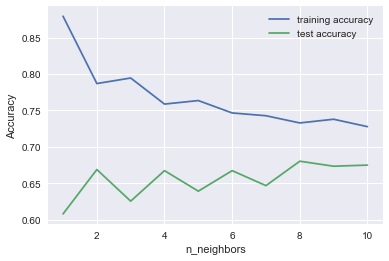

In [26]:
# k-NN 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.neighbors import  KNeighborsClassifier

X = movie_data.drop(["title", "failure"], axis=1)
Y = movie_data.failure
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify = Y, random_state=66)

training_accuracy = []
test_accuracy =[]

neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    training_accuracy.append(clf.score(X_train,y_train))
    
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy,label="training accuracy")
plt.plot(neighbors_settings, test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# サポートベクターマシン

In [27]:
# SVM
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

X = movie_data.drop(["title", "failure"], axis=1)
Y = movie_data.failure
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify = Y, random_state=50)

model = LinearSVC()
clf = model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: LinearSVC 0.292491121258
test: LinearSVC 0.292237442922


In [28]:
# SVM
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

X = movie_data.drop(["title", "failure"], axis=1)
Y = movie_data.failure
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify = Y, random_state=50)

model = LinearSVC()

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

train: LinearSVC 0.706240487062
test: LinearSVC 0.708523592085


サポートベクターマシンは標準化が大事

## ジャンルごとの可視化

In [42]:
def draw_genre_histo(genre_name):
    runtime_df = movie_data[[genre_name, "failure", "runtime"]]
    runtime_df0 = runtime_df[runtime_df["failure"] == 0]
    runtime_df1 = runtime_df[runtime_df["failure"] == 1]
    print("======", genre_name, "======\n")
    
    print("success: \n", runtime_df0["runtime"].describe(), "\n")
    print("failure: \n", runtime_df1["runtime"].describe())

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.hist([runtime_df0["runtime"], runtime_df1["runtime"]], bins=30, normed=True, color=['green', 'red'], label=['success', 'failure'])
    ax.set_title(genre_name + ' films runtime histogram')
    ax.set_xlabel('runtime')
    ax.set_ylabel('freq')
    ax.legend(loc='upper left')
    fig.show()
    
    print("\n\n")


In [43]:
genres_df = pd.read_csv(genres_URL)
genres_list = genres_df.name.tolist()

====== Animation ======

success: 
 count    3719.000000
mean      111.381823
std        22.188516
min        26.000000
25%        96.000000
50%       107.000000
75%       123.000000
max       320.000000
Name: runtime, dtype: float64
failure: 
 count    1537.000000
mean      107.525699
std        19.450412
min        63.000000
25%        95.000000
50%       104.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64



====== Comedy ======

success: 
 count    3719.000000
mean      111.381823
std        22.188516
min        26.000000
25%        96.000000
50%       107.000000
75%       123.000000
max       320.000000
Name: runtime, dtype: float64
failure: 


/Users/labuser/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


 count    1537.000000
mean      107.525699
std        19.450412
min        63.000000
25%        95.000000
50%       104.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64



====== Family ======

success: 
 count    3719.000000
mean      111.381823
std        22.188516
min        26.000000
25%        96.000000
50%       107.000000
75%       123.000000
max       320.000000
Name: runtime, dtype: float64
failure: 
 count    1537.000000
mean      107.525699
std        19.450412
min        63.000000
25%        95.000000
50%       104.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64



====== Adventure ======

success: 
 count    3719.000000
mean      111.381823
std        22.188516
min        26.000000
25%        96.000000
50%       107.000000
75%       123.000000
max       320.000000
Name: runtime, dtype: float64
failure: 
 count    1537.000000
mean      107.525699
std        19.450412
min        63.000000
25%        95.000000
50%  

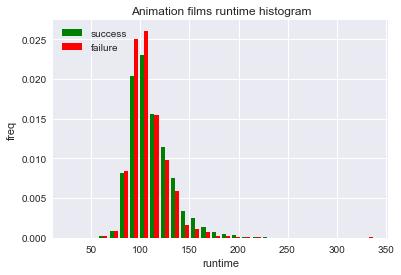

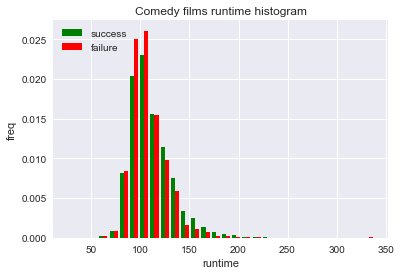

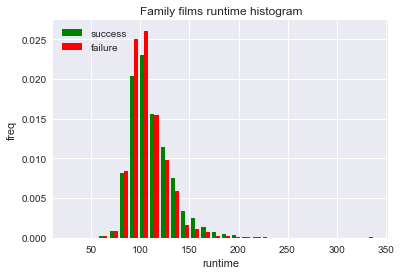

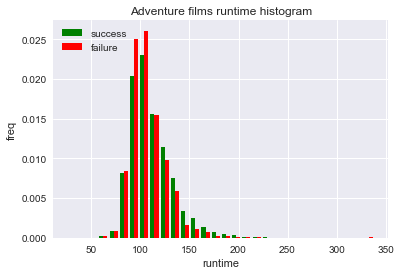

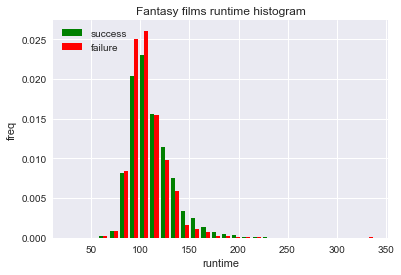

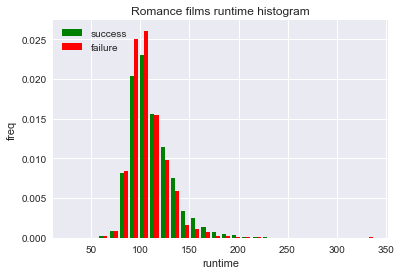

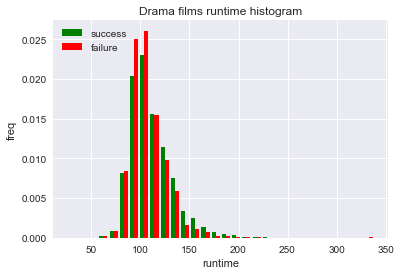

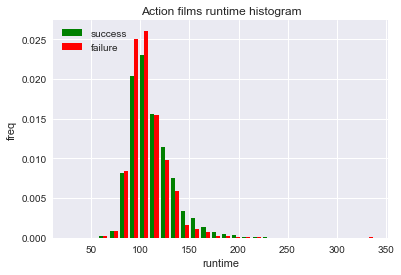

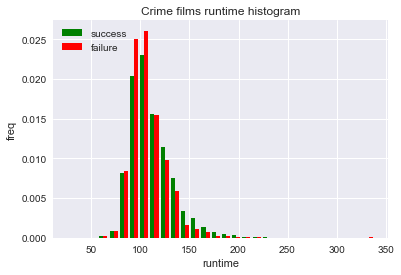

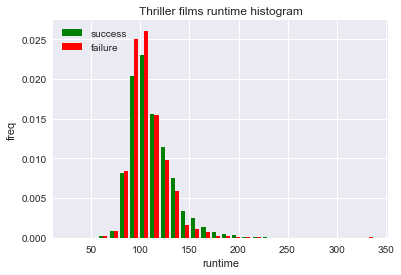

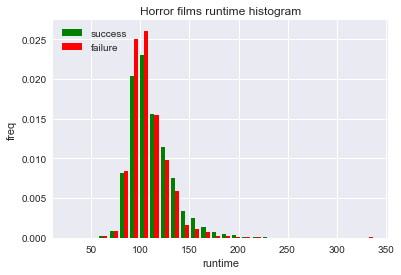

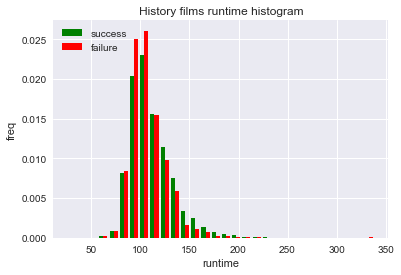

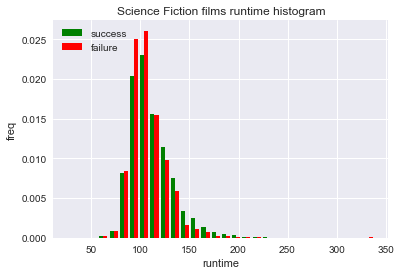

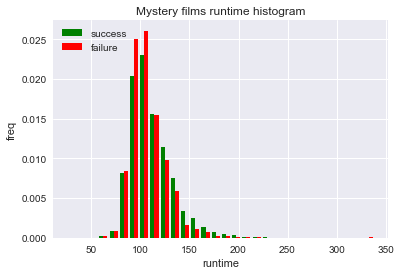

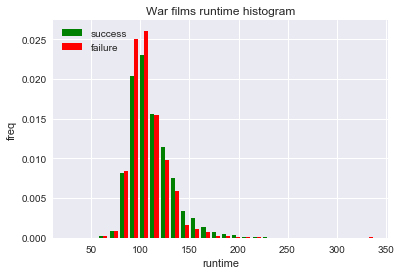

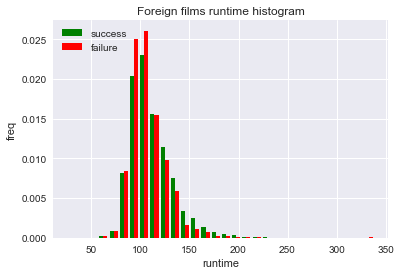

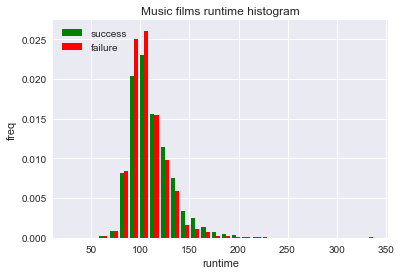

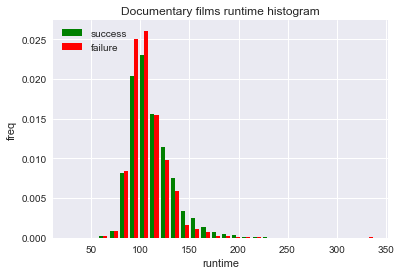

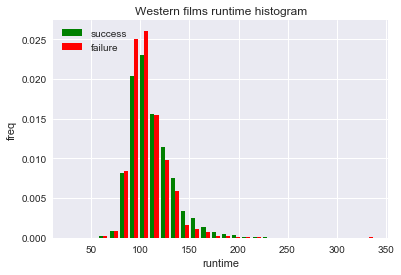

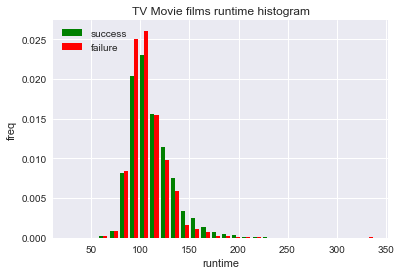

In [41]:
for genre in genres_list:
    draw_genre_histo(genre)